# CNN Deep Learning Model

In [1]:
path_input = r"D:/Capstone Project/Data ready to import into DL model/"
path_output = r"D:/Capstone Project/Outputs DL model/binary approach/v3/"

# Load the X and y arrays (Images and Labels, respectively)
# The X array is already normalised and the y array is encoded into OneHotEncoder.
import numpy as np

X = np.load(path_input+"X.npy")
y = np.load(path_input+"binary approach/y.npy")

In [2]:
print("X shape:", np.shape(X))
print("y shape:", np.shape(y))

X shape: (13524, 250, 250)
y shape: (13524, 2)


## Train-validation-test split
But first let's transform the dataset in order to handle the imbalanced classes by using the Synthetic Minority Oversampling Technique, SMOTE. This technique, as the name suggests, is used to perform better models when the dataset is imbalanced. The SMOTE works by to synthesizing new examples from the minority class.

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X.reshape(13524, 250*250), y)

X = X.reshape(np.shape(X)[0], 250, 250)
y = np.eye(2)[y.flatten()]

In [4]:
print("X shape:", np.shape(X))
print("y shape:", np.shape(y))

X shape: (15861, 250, 250)
y shape: (15861, 2)


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation
# Train: 80%
# Validation: 10%
# Test: 10%

X_train, X_preval, y_train, y_preval= train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test= train_test_split(X_preval, y_preval, test_size=0.5, random_state=42)

np.save(path_output+'X', X)
np.save(path_output+'y', y)

del X_preval, y_preval, X, y

In [6]:
## Train the model with a Neural Network
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## Define the model

In [7]:
input_shape = (250, 250, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(80, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(80, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(80, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(2, activation="sigmoid", kernel_regularizer=keras.regularizers.l2(0.001)),
    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 40)      400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 40)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 40)      14440     
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 40)      14440     
                                                                 
 conv2d_3 (Conv2D)           (None, 118, 118, 80)      28880     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 80)       0         
 2D)                                                    

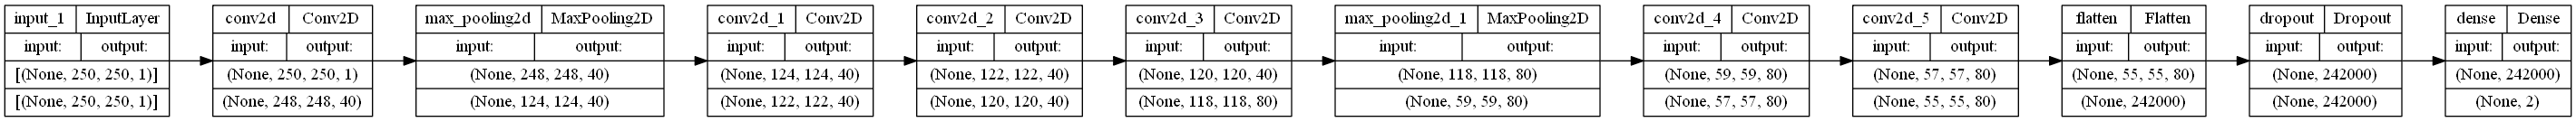

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, rankdir='LR')

In [10]:
opt = Adam(learning_rate=0.0007)
model.compile(loss="binary_crossentropy",
              optimizer=opt, metrics=["binary_accuracy"])

## Train the model

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
397/397 [==============================] - 513s 1s/step - loss: 0.6050 - binary_accuracy: 0.6953 - val_loss: 0.5434 - val_binary_accuracy: 0.7509
Epoch 2/10
397/397 [==============================] - 512s 1s/step - loss: 0.5571 - binary_accuracy: 0.7279 - val_loss: 0.5109 - val_binary_accuracy: 0.7680
Epoch 3/10
397/397 [==============================] - 511s 1s/step - loss: 0.5100 - binary_accuracy: 0.7608 - val_loss: 0.4662 - val_binary_accuracy: 0.7888
Epoch 4/10
397/397 [==============================] - 512s 1s/step - loss: 0.4860 - binary_accuracy: 0.7793 - val_loss: 0.4615 - val_binary_accuracy: 0.7875
Epoch 5/10
397/397 [==============================] - 511s 1s/step - loss: 0.4661 - binary_accuracy: 0.7917 - val_loss: 0.4357 - val_binary_accuracy: 0.8156
Epoch 6/10
397/397 [==============================] - 510s 1s/step - loss: 0.4510 - binary_accuracy: 0.8066 - val_loss: 0.4319 - val_binary_accuracy: 0.8285
Epoch 7/10
397/397 [==============================] - 512s

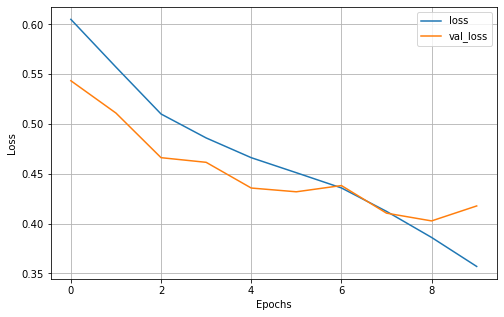

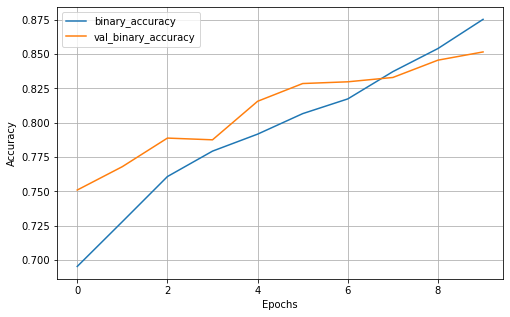

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.xlabel("Epochs"),plt.ylabel("Loss")
plt.grid(True)
plt.show()

pd.DataFrame(history.history)[['binary_accuracy', 'val_binary_accuracy']].plot(figsize=(8, 5))
plt.xlabel("Epochs"),plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [13]:
# Save the model
model.save(path_output+'DeepLearningModel.h5')

In [14]:
# Save the history of the model
np.save(path_output+'history.npy', history.history)